In [1]:
# Import modules
# Make sure you have installed netCDF4, xarray, and nc-time-axis  
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Create a xr dataarray
da = xr.DataArray([1, 2, 3, -1, 2])
da

<xarray.DataArray (dim_0: 5)>
array([ 1,  2,  3, -1,  2])
Dimensions without coordinates: dim_0

In [3]:
# Add a dimension name
da = xr.DataArray([1, 2, 3, -1, 2], dims=['x'])
da

<xarray.DataArray (x: 5)>
array([ 1,  2,  3, -1,  2])
Dimensions without coordinates: x

In [4]:
# Add a coordinate
da = xr.DataArray([1, 2, 3, -1, 2],
                  dims=['x'],
                  coords={'x': [10, 20, 30, 40, 50]})
da

<xarray.DataArray (x: 5)>
array([ 1,  2,  3, -1,  2])
Coordinates:
  * x        (x) int32 10 20 30 40 50

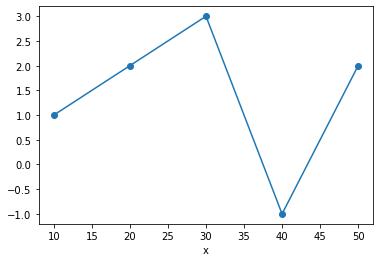

In [5]:
# Simple plot with xr built-in plot function
da.plot(marker='o')

In [5]:
# Open a netCDF4 file
ds = xr.open_dataset("CESM2_200001-201412.nc", engine="netcdf4")

In [6]:
# Show dataset
ds

<xarray.Dataset>
Dimensions:    (time: 180, lat: 192, lon: 288, nbnd: 2)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time       (time) object 2000-01-15 12:00:00 ... 2014-12-15 12:00:00
Dimensions without coordinates: nbnd
Data variables:
    tas        (time, lat, lon) float32 ...
    time_bnds  (time, nbnd) object ...
    lat_bnds   (lat, nbnd) float64 ...
    lon_bnds   (lon, nbnd) float64 ...
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  219000.0
    case_id:                972
    ...                     ...
    sub_experiment_id:      none
    table_id:               Amon
    tracking_id:            hdl:21.14100/a7278f6d-6a1b-4050-8f06-a8033604736a
    variable_id:            tas
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r11i1p1f1

In [8]:
# Show dataset info
ds.info

<bound method Dataset.info of <xarray.Dataset>
Dimensions:    (time: 180, lat: 192, lon: 288, nbnd: 2)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time       (time) object 2000-01-15 12:00:00 ... 2014-12-15 12:00:00
Dimensions without coordinates: nbnd
Data variables:
    tas        (time, lat, lon) float32 ...
    time_bnds  (time, nbnd) object 2000-01-01 00:00:00 ... 2015-01-01 00:00:00
    lat_bnds   (lat, nbnd) float64 -90.0 -89.53 -89.53 ... 89.53 89.53 90.0
    lon_bnds   (lon, nbnd) float64 -0.625 0.625 0.625 ... 358.1 358.1 359.4
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  219000.0
    case_id:                972
    ...                     ...
    sub_experiment_id:      none
    table_id:         

In [7]:
# Check data variables
ds.data_vars

Data variables:
    tas        (time, lat, lon) float32 ...
    time_bnds  (time, nbnd) object 2000-01-01 00:00:00 ... 2015-01-01 00:00:00
    lat_bnds   (lat, nbnd) float64 -90.0 -89.53 -89.53 ... 89.53 89.53 90.0
    lon_bnds   (lon, nbnd) float64 -0.625 0.625 0.625 ... 358.1 358.1 359.4

In [10]:
# Check data dimension names
ds.dims

Frozen({'time': 180, 'lat': 192, 'lon': 288, 'nbnd': 2})

In [11]:
# Check data coordinates
ds.coords

Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 2000-01-15 12:00:00 ... 2014-12-15 12:00:00

In [12]:
# Check data attributes (metadata)
ds.attrs

{'Conventions': 'CF-1.7 CMIP-6.2',
 'activity_id': 'CMIP',
 'branch_method': 'standard',
 'branch_time_in_child': 674885.0,
 'branch_time_in_parent': 219000.0,
 'case_id': '972',
 'cesm_casename': 'b.e21.BHIST.f09_g17.CMIP6-historical.011',
 'contact': 'cesm_cmip6@ucar.edu',
 'creation_date': '2019-04-02T05:28:31Z',
 'data_specs_version': '01.00.29',
 'experiment': 'Simulation of recent past (1850 to 2014). Impose changing conditions (consistent with observations). Should be initialised from a point early enough in the pre-industrial control run to ensure that the end of all the perturbed runs branching from the end of this historical run end before the end of the control. Only one ensemble member is requested but modelling groups are strongly encouraged to submit at least three ensemble members of their CMIP historical simulation. ',
 'experiment_id': 'historical',
 'external_variables': 'areacella',
 'forcing_index': 1,
 'frequency': 'mon',
 'further_info_url': 'https://furtherinfo.e

In [13]:
# Extract the tas variable (DataArray)
ds['tas']

<xarray.DataArray 'tas' (time: 180, lat: 192, lon: 288)>
[9953280 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 2000-01-15 12:00:00 ... 2014-12-15 12:00:00
Attributes: (12/19)
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        TREFHT
    description:    near-surface (usually, 2 meter) air temperature
    frequency:      mon
    id:             tas
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Near-Surface Air Temperature
    type:           real
    units:          K
    variable_id:    tas

In [19]:
# The actual array data
# np array
ds["tas"].data

array([[[247.15303, 247.15302, 247.15302, ..., 247.153  , 247.15302,
         247.15302],
        [247.80325, 247.74376, 247.56442, ..., 247.91016, 247.88065,
         247.84268],
        [248.37344, 248.29222, 248.23836, ..., 248.71902, 248.63567,
         248.52878],
        ...,
        [240.68915, 240.70212, 240.7148 , ..., 240.6477 , 240.66093,
         240.6746 ],
        [240.98354, 240.9889 , 240.99457, ..., 240.96875, 240.97357,
         240.97845],
        [241.1705 , 241.17052, 241.17053, ..., 241.17044, 241.17046,
         241.17047]],

       [[236.51689, 236.51689, 236.51689, ..., 236.51689, 236.51689,
         236.51689],
        [236.9432 , 236.89592, 236.73224, ..., 236.99376, 236.97823,
         236.96432],
        [237.28722, 237.2335 , 237.1985 , ..., 237.55449, 237.49416,
         237.40793],
        ...,
        [241.329  , 241.3181 , 241.30516, ..., 241.35661, 241.34663,
         241.33691],
        [241.3106 , 241.30481, 241.29861, ..., 241.32701, 241.32219,
   

In [20]:
# Datarray coordinates
ds["tas"].coords

Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 2000-01-15 12:00:00 ... 2014-12-15 12:00:00

In [23]:
# Dataarray attributes
ds["tas"].attrs

{'cell_measures': 'area: areacella',
 'cell_methods': 'area: time: mean',
 'comment': 'TREFHT',
 'description': 'near-surface (usually, 2 meter) air temperature',
 'frequency': 'mon',
 'id': 'tas',
 'long_name': 'Near-Surface Air Temperature',
 'mipTable': 'Amon',
 'out_name': 'tas',
 'prov': 'Amon ((isd.003))',
 'realm': 'atmos',
 'standard_name': 'air_temperature',
 'time': 'time',
 'time_label': 'time-mean',
 'time_title': 'Temporal mean',
 'title': 'Near-Surface Air Temperature',
 'type': 'real',
 'units': 'K',
 'variable_id': 'tas'}

In [22]:
# Dataarray attributes
ds["tas"].name

'tas'

In [8]:
# The original object, i.e. no selection
ds.tas.isel()

# Data at lat=100
ds.tas.isel(lat=100)

# Data at lat=100 and the last two time steps 
ds.tas.isel(lat=100, time=[-2, -1])

# Data lat=100 and time ranging from index 10 and 20 
ds.tas.isel(lon=100, time=slice(10, 20))

<xarray.DataArray 'tas' (time: 10, lat: 192)>
array([[235.85551, 234.55927, 234.04126, ..., 252.19244, 252.12074, 251.8596 ],
       [245.92458, 244.82182, 244.25714, ..., 254.9857 , 254.38263, 253.71445],
       [244.74162, 243.65564, 243.38695, ..., 246.49345, 245.8732 , 244.89249],
       ...,
       [220.08241, 220.00351, 219.62608, ..., 271.70505, 271.8897 , 272.1107 ],
       [215.47134, 215.46117, 215.07767, ..., 272.68958, 272.60373, 272.59506],
       [218.88512, 218.10718, 217.67311, ..., 272.03568, 272.09183, 272.03326]],
      dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
    lon      float64 125.0
  * time     (time) object 2000-11-15 00:00:00 ... 2001-08-15 12:00:00
Attributes: (12/19)
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        TREFHT
    description:    near-surface (usually, 2 meter) air temperature
    frequency:      mon
    id:             tas
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Near-Surface Air Temperature
    type:           real
    units:          K
    variable_id:    tas

In [25]:
# Select data in 2013
ds.tas.sel(time='2013')

# Select data in 2013-01-15
ds.tas.sel(time='2013-01-15')

# Select data in a list
ds.tas.sel(lon=['100','356.25'])

# Select data in a range
# Both the start and the stop are included
ds.tas.sel(time=slice("2013-01-01", "2014-12-31"))

<xarray.DataArray 'tas' (time: 24, lat: 192, lon: 288)>
array([[[251.0122 , 251.01219, ..., 251.01219, 251.01219],
        [251.75168, 251.70715, ..., 251.77245, 251.76056],
        ...,
        [246.26265, 246.28883, ..., 246.20654, 246.23535],
        [246.07198, 246.07327, ..., 246.06903, 246.07057]],

       [[237.78917, 237.78917, ..., 237.78917, 237.78917],
        [238.95834, 238.91258, ..., 238.98819, 238.97308],
        ...,
        [240.98769, 240.98885, ..., 240.98486, 240.98642],
        [240.97531, 240.97554, ..., 240.97476, 240.97505]],

       ...,

       [[235.53151, 235.53151, ..., 235.53151, 235.53151],
        [236.374  , 236.32649, ..., 236.41884, 236.39745],
        ...,
        [259.4753 , 259.47998, ..., 259.46725, 259.47116],
        [259.7919 , 259.79153, ..., 259.79282, 259.79233]],

       [[250.03975, 250.03975, ..., 250.03976, 250.03975],
        [250.7029 , 250.66605, ..., 250.72278, 250.71268],
        ...,
        [253.26057, 253.28796, ..., 253.20187, 253.23189],
        [252.8665 , 252.86855, ..., 252.86179, 252.86426]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 2013-01-15 12:00:00 ... 2014-12-15 12:00:00
Attributes: (12/19)
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        TREFHT
    description:    near-surface (usually, 2 meter) air temperature
    frequency:      mon
    id:             tas
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Near-Surface Air Temperature
    type:           real
    units:          K
    variable_id:    tas

In [26]:
#ds.tas.sel(lat=39.5, lon=105.7)

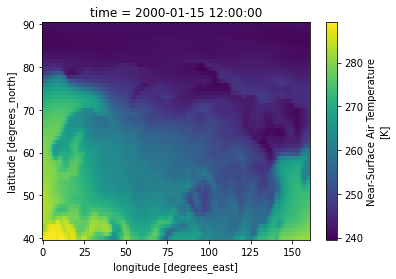

In [16]:
# Using the nearest method to find a nearby value
ds.tas.sel(lat=39.5, lon=105.7, method='nearest')

# Using the slice method to find a nearby value
ds.tas.sel(lat=slice(39, 39.5), lon=slice(106.1, 106.3))

ds.tas.isel(time=0).sel(lon=slice(0, 160), lat=slice(40, 160)).plot()

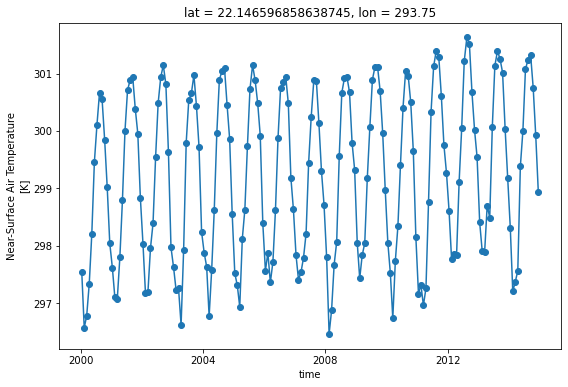

In [30]:
# Time series of the near surface temperature at Shenzhen
ds.tas.sel(lon=294.1, lat=22.5, method='nearest').plot(marker="o", size=6);

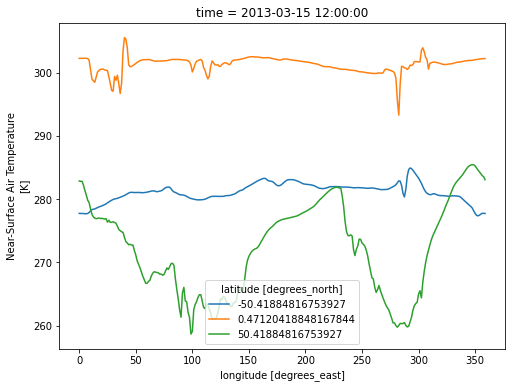

In [31]:
# Time series of the near surface temperature at 3 latitudes
ds.tas.sel(lat=[-50, 0, 50], time="2013-03", method="nearest").plot(
    x="lon", hue="lat", figsize=(8, 6)
)

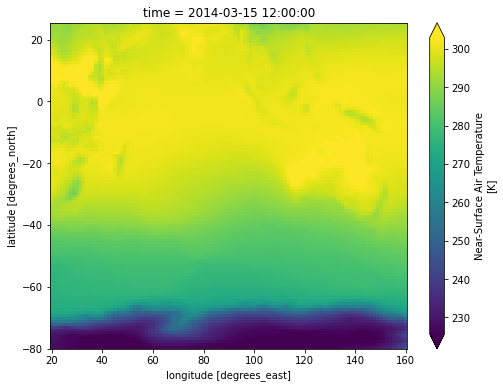

In [32]:
# 2D map over lat (-80,25) and lon (20,160) at timestamp -10
ds.tas.isel(time=-10).sel(lon=slice(20, 160), 
                          lat=slice(-80, 25)).plot(robust=True, figsize=(8, 6))

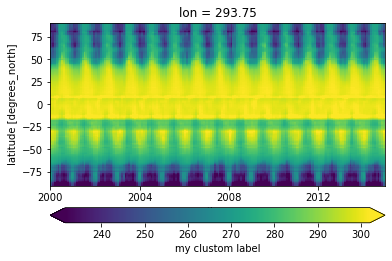

In [33]:
# Define keyword arguments that are passed to matptolib.pyplot.colorbar
colorbar_kwargs = {
    "orientation": "horizontal",
    "label": "my clustom label",
    "pad": 0.1,
}

# Plot
ds.tas.sel(lon=294.1, method='nearest').plot(
    # coordinate to plot on the x-axis of the plot
    x="time", 
    # set colorbar limits to 2nd and 98th percentile of data
    robust=True,  
    cbar_kwargs=colorbar_kwargs,
)

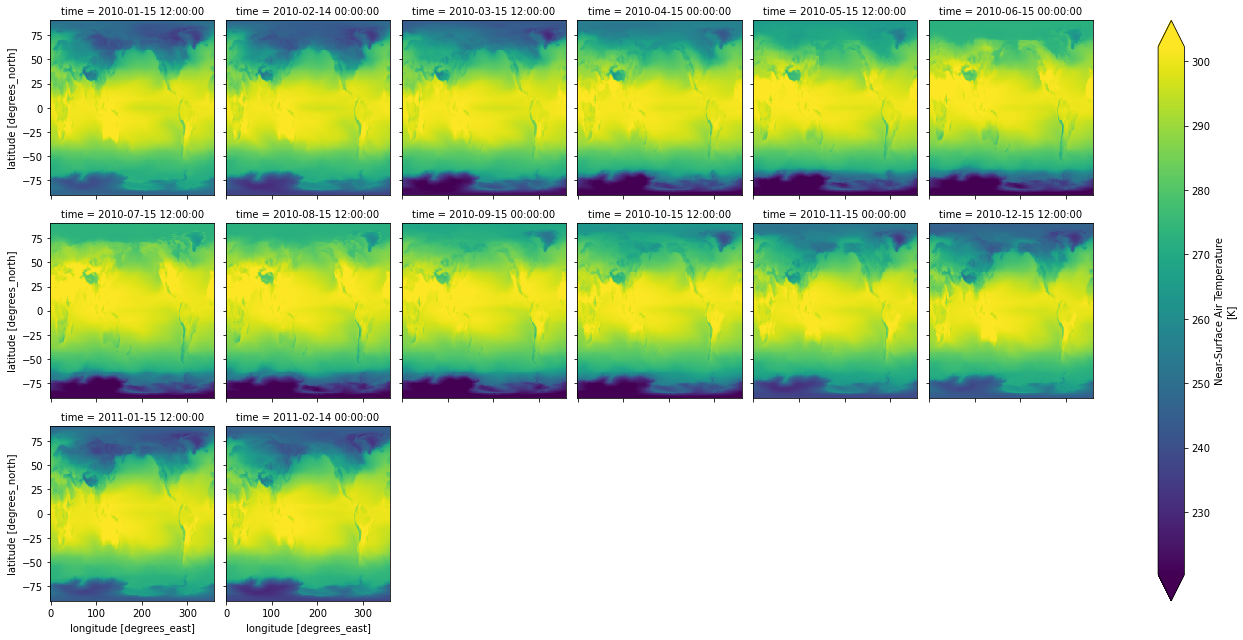

In [55]:
# Plot monthly mean near surface temperture in 2010 and 2011, one at a panel
ds.tas.sel(time=slice("2010", "2011")).plot(col="time", col_wrap=6, robust=True)

(array([ 136673.,  240558.,  269893.,  627900.,  689006., 1115424.,
        1886530., 1994066., 2922350.,   70880.]),
 array([206.88835, 217.84947, 228.8106 , 239.77171, 250.73283, 261.69397,
        272.6551 , 283.6162 , 294.57733, 305.53845, 316.49957],
       dtype=float32),
 <BarContainer object of 10 artists>)

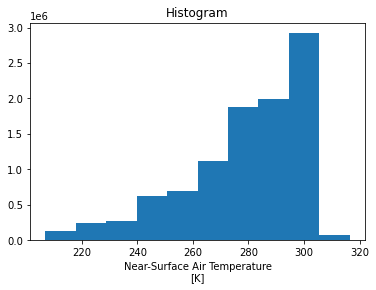

In [35]:
ds.tas.plot()

In [36]:
# Convert the air temperature from degree Kelvin to Celsius
ds.tas - 273.15

<xarray.DataArray 'tas' (time: 180, lat: 192, lon: 288)>
array([[[-25.996964 , -25.996979 , -25.996979 , ..., -25.996994 ,
         -25.996979 , -25.996979 ],
        [-25.34674  , -25.406235 , -25.585571 , ..., -25.239838 ,
         -25.269348 , -25.307312 ],
        [-24.77655  , -24.857773 , -24.911636 , ..., -24.43097  ,
         -24.514328 , -24.621216 ],
        ...,
        [-32.460846 , -32.447876 , -32.435196 , ..., -32.50229  ,
         -32.48906  , -32.475388 ],
        [-32.16646  , -32.161087 , -32.155426 , ..., -32.181244 ,
         -32.176422 , -32.17154  ],
        [-31.979492 , -31.979477 , -31.979462 , ..., -31.979553 ,
         -31.979538 , -31.979523 ]],

       [[-36.633102 , -36.633102 , -36.633102 , ..., -36.633102 ,
         -36.633102 , -36.633102 ],
        [-36.206787 , -36.254074 , -36.417755 , ..., -36.156235 ,
         -36.17177  , -36.18567  ],
        [-35.862778 , -35.91649  , -35.951492 , ..., -35.595505 ,
         -35.655838 , -35.742065 ],
...
        [-14.108704 , -14.105713 , -14.103302 , ..., -14.127014 ,
         -14.121765 , -14.115448 ],
        [-13.674683 , -13.670013 , -13.665222 , ..., -13.686951 ,
         -13.682739 , -13.678833 ],
        [-13.358093 , -13.358459 , -13.358826 , ..., -13.356659 ,
         -13.357178 , -13.357666 ]],

       [[-23.110245 , -23.110245 , -23.110245 , ..., -23.11023  ,
         -23.11023  , -23.110245 ],
        [-22.447098 , -22.483948 , -22.635895 , ..., -22.423843 ,
         -22.427216 , -22.437317 ],
        [-21.990753 , -22.016556 , -22.026505 , ..., -21.802902 ,
         -21.841705 , -21.897903 ],
        ...,
        [-19.454529 , -19.396225 , -19.339905 , ..., -19.60376  ,
         -19.555237 , -19.50821  ],
        [-19.88942  , -19.86203  , -19.83342  , ..., -19.97908  ,
         -19.94812  , -19.918106 ],
        [-20.283493 , -20.281448 , -20.279587 , ..., -20.29094  ,
         -20.288208 , -20.285736 ]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 2000-01-15 12:00:00 ... 2014-12-15 12:00:00

In [37]:
ds.tas ** 2

<xarray.DataArray 'tas' (time: 180, lat: 192, lon: 288)>
array([[[61084.62 , 61084.613, 61084.613, ..., 61084.605, 61084.613,
         61084.613],
        [61406.453, 61376.97 , 61288.145, ..., 61459.445, 61444.816,
         61425.996],
        [61689.367, 61649.027, 61622.28 , ..., 61861.152, 61819.695,
         61766.555],
        ...,
        [57931.266, 57937.508, 57943.613, ..., 57911.316, 57917.684,
         57924.266],
        [58073.066, 58075.652, 58078.383, ..., 58065.938, 58068.26 ,
         58070.617],
        [58163.21 , 58163.22 , 58163.227, ..., 58163.18 , 58163.188,
         58163.195]],

       [[55940.24 , 55940.24 , 55940.24 , ..., 55940.24 , 55940.24 ,
         55940.24 ],
        [56142.082, 56119.676, 56042.152, ..., 56166.043, 56158.68 ,
         56152.09 ],
        [56305.223, 56279.734, 56263.13 , ..., 56432.137, 56403.473,
         56362.523],
...
        [67102.39 , 67103.94 , 67105.19 , ..., 67092.91 , 67095.625,
         67098.9  ],
        [67327.44 , 67329.86 , 67332.34 , ..., 67321.07 , 67323.26 ,
         67325.28 ],
        [67491.83 , 67491.64 , 67491.45 , ..., 67492.58 , 67492.305,
         67492.055]],

       [[62519.875, 62519.875, 62519.875, ..., 62519.883, 62519.883,
         62519.875],
        [62851.94 , 62833.465, 62757.312, ..., 62863.6  , 62861.91 ,
         62856.848],
        [63080.965, 63068.004, 63063.008, ..., 63175.36 , 63155.855,
         63127.613],
        ...,
        [64361.39 , 64390.977, 64419.562, ..., 64285.69 , 64310.3  ,
         64334.156],
        [64140.918, 64154.793, 64169.285, ..., 64095.51 , 64111.188,
         64126.39 ],
        [63941.47 , 63942.5  , 63943.44 , ..., 63937.703, 63939.082,
         63940.332]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 2000-01-15 12:00:00 ... 2014-12-15 12:00:00

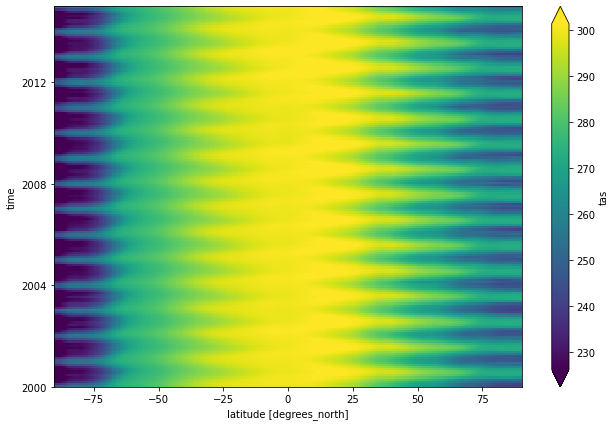

In [40]:
# Compute the mean of all locations and timesteps
ds.tas.mean()

# Plot
ds.tas.mean(dim='lon').plot(size=7, robust=True)

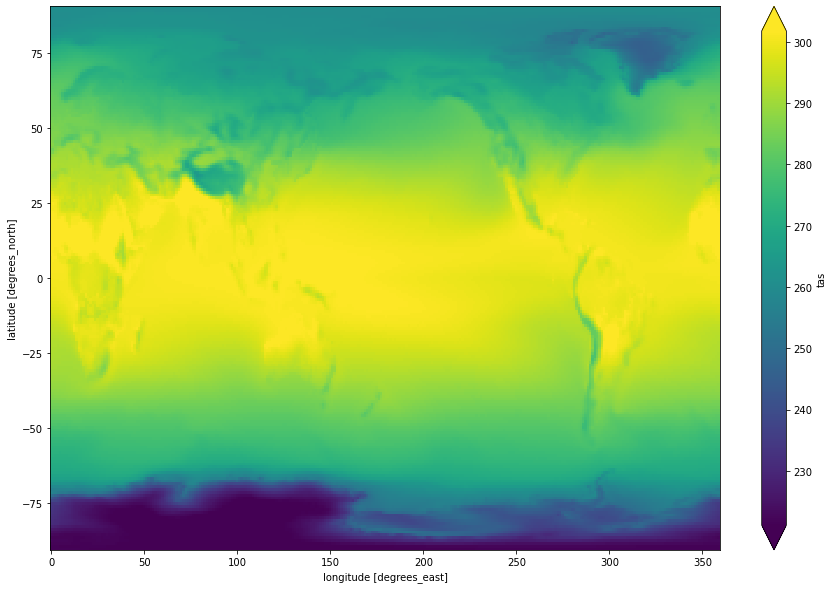

In [17]:
# Compute temporal min
ds.tas.min(dim=['time'])
# Compute spatial sum
ds.tas.sum(dim=['lat', 'lon'])
# compute temporal median
ds.tas.median(dim='time').plot(size=10, robust=True)

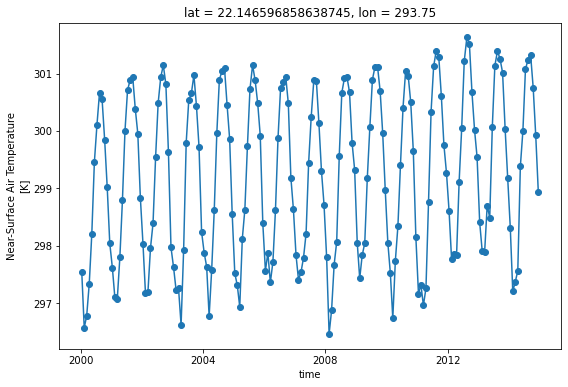

In [44]:
# Near surface temperature at Shenzhen
ds.tas.sel(lon=294.1, lat=22.5, method='nearest').plot(marker="o", size=6)

In [56]:
# Group data by month
ds.tas.groupby(ds.time.dt.month)
#ds.time.dt.year
#ds.time.dt.month

# Group data by month
#ds.tas.groupby('time.month')

DataArrayGroupBy, grouped over 'month'
12 groups with labels 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12.

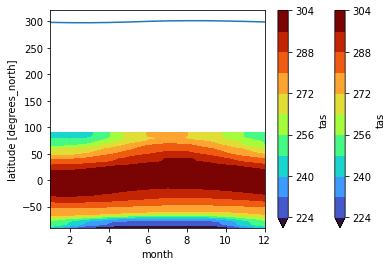

In [21]:
# Calculate the climatology 
tas_clim = ds.tas.groupby('time.month').mean()
tas_clim

# Plot climatology at a specific point (Shenzhen)
tas_clim.sel(lon=294.1, lat=22.5, method='nearest').plot()

# Plot zonal mean climatology
tas_clim.mean(dim='lon').transpose().plot.contourf(levels=12, robust=True, cmap='turbo')

# Plot zonal mean climatology
tas_clim.mean(dim='lon').transpose().plot.contourf(levels=12, robust=True, cmap='turbo');


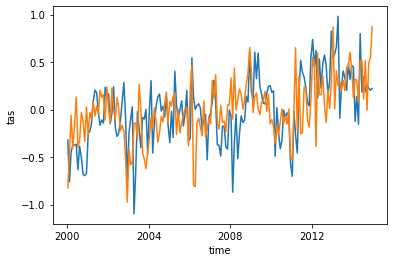

In [50]:
# Group data by month
group_data = ds.tas.groupby('time.month')

# Apply mean to grouped data, and then compute the anomaly 
tas_anom = group_data - group_data.mean(dim='time')
tas_anom

# Plot anomalies at a specific point (Shenzhen)
tas_anom.sel(lon=294.1, lat=22.5, method='nearest').plot()

# Plot global mean anomalies
tas_anom.mean(dim=['lat', 'lon']).plot()

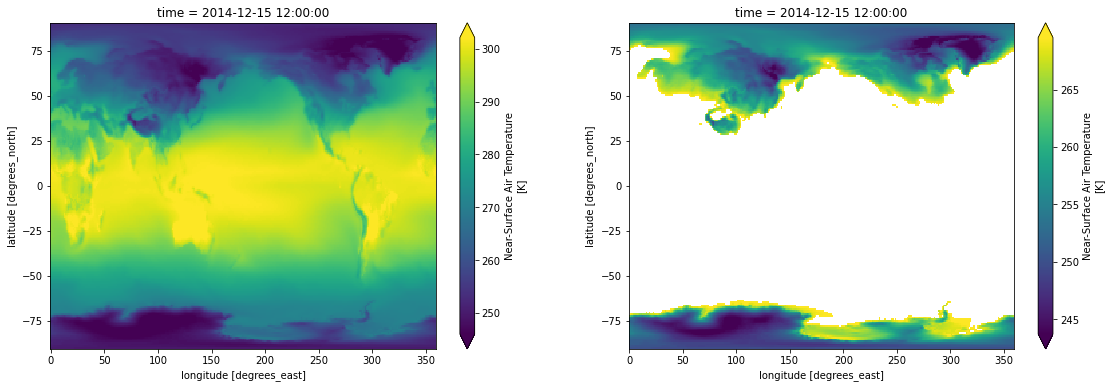

In [51]:
# Select data
sample = ds.tas.isel(time=-1)
sample

# Sample data where temperature is less than 270
masked_sample = sample.where(sample < 270.0)
masked_sample

# Plot 2 panels
fig, axes = plt.subplots(ncols=2, figsize=(19, 6))
sample.plot(ax=axes[0], robust=True)
masked_sample.plot(ax=axes[1], robust=True)

In [24]:
ds.tas.sel(time=slice("2005-01", "2010-12")).mean()

<xarray.DataArray 'tas' ()>
array(278.74582, dtype=float32)

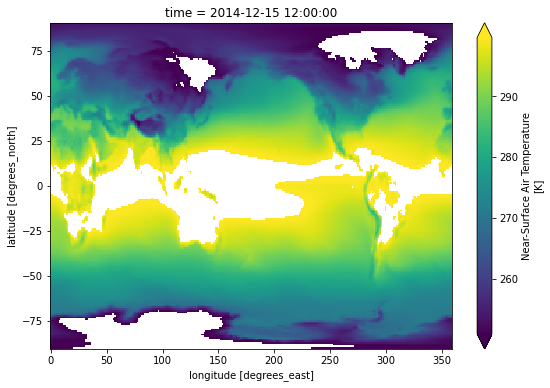

In [54]:
# More than one conditions
sample.where((sample > 250) & (sample < 300)).plot(size=6, robust=True);

# More than one conditions
#sample.where((sample.lat < 5) & (sample.lat > -5) & (sample.lon > 190) & 
#             (sample.lon < 240)).plot(size=6, robust=True)

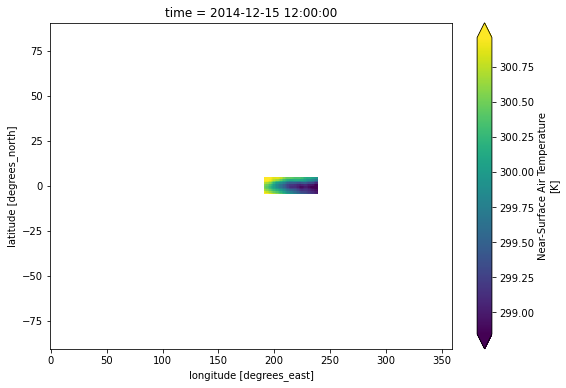

In [174]:
# More than one conditions
sample.where((sample.lat < 5) & (sample.lat > -5) & (sample.lon > 190) & (sample.lon < 240)).plot(
    size=6, robust=True)